# 【吴恩达deeplearning.ai笔记二】 通俗讲解神经网络

**神经网络（Neural Network）**的构筑理念是受到生物神经网络功能的运作启发而产生的。人工神经网络通常是通过一个基于数学统计学类型的学习方法得以优化，所以人工神经网络也是数学统计学方法的一种实际应用。

和其他机器学习方法一样，神经网络已经被用于解决各种各样的问题，例如机器视觉和语音识别，这些问题都是很难被传统基于规则的编程所解决的。

## 1.神经网络

机器学习领域所说的神经网络指的是一种模仿生物神经网络的结构和功能而建立的数学或计算模型，用于对函数进行估计或近似。

例如，给定一些关于市面上房子的面积及价格的数据，需要根据这些数据建立一个房价预测模型。即输入一个房子的面积，希望通过这个模型输出一个房价的预测值。显然，这是一个线性回归问题，因为一般情况下房价和房子的面积都成正相关。这时，可以将已知数据的关系表现在平面坐标系中：

<img align="left" src="figures/neural1.jpg">

对数据进行线性拟合，且房价永远不会是负数，得到图中的**ReLU函数（Rectified Linear Unit，修正线性单元）**。

<img align="left" src="figures/neural2.jpg">

在这个简单的例子中，房子的面积作为输入，房价作为输出，而ReLU函数便充当一个神经元的作用，来产生输出。


然而房价除了受房子的面积影响之外，还会受卧室的数量、房子的位置以及地区的财富水平等因素的影响，这时就需要构建一个更为复杂的神经网络模型。

<img align="left" src="figures/neural3.jpg">

这就构成了一个神经网络模型基本结构，神经网络会自动生成**隐藏层（Hidden Units）**来处理输入，生成输出。这个问题中，只要拥有足够的训练数据，就能生成一个较好的神经网络模型，得到较为精确的结果。


简单而言，深度学习便是更为复杂的神经网络。

<img align="left" src="figures/neural4.jpg">

在这个模型中，先建立了一个成本函数，进而不断采用梯度下降法找到参数  和  的最优解。采用这种算法编写的猫识别器最终的准确率还不够高，要进一步提高识别的准确率，就需要建立起一个多层的神经网络来训练样本。

## 2.符号约定

如图所示的神经网络中，前面为输入层，中间为隐藏层 ，最后为输出层。中间层被称为隐藏层的原因是因为在训练过程中，将看到输入的样本有哪些，输出的结果是什么，中间层中的神经节点产生的真实值无法被观察到。

所以中间层被称为隐藏层，只是因为你不会在训练集中看到它。

<img align="left" src="figures/neural5.jpg">

前面的逻辑回归中，用X表示输入，这里用符号$a^[0]$代替，上标“[ ]”中的数字表示神经网络中的第几层，且符号a代表着激活（Activation），指的是不同层次的神经网络传递给后续层次的值。

<img align="left" src="figures/neural6.jpg">
<img align="left" src="figures/neural0.jpg">

## 3.神经网络的表示

<img align="left" src="figures/neural7.jpg">
<img align="left" src="figures/neural8.jpg">
<img align="left" src="figures/neural0.png">
<img align="left" src="figures/neural9.jpg">
<img align="left" src="figures/neural10.jpg">

逻辑回归中，直接将两个参数都初始化为零。而在神经网络中，通常将参数 w进行随机初始化，参数 b则初始化为 0 。


除 $w,b$外的各种参数，如学习率 $alpha$、神经网络的层数 l，第 l 层包含的节点数$ n^{[k]} $及隐藏层中用的哪种激活函数，都称为超参数（Hyper Parameters），因为它们的值决定了参数 w,b最后的值。

# 4.激活函数

建立一个神经网络时，需要关心的一个问题是，在每个不同的独立层中应当采用哪种激活函数。逻辑回归中，一直采用sigmoid函数作为激活函数，此外还有一些更好的选择。

**tanh函数（Hyperbolic Tangent Function，双曲正切函数）**的表达式为：

<img align="left" src="figures/neural1.png">

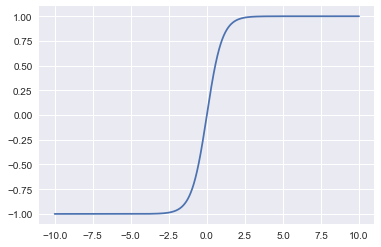

In [1]:
# 函数图像为：
# 可以画出其函数图像
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;sns.set()

z = np.linspace(-10, 10, 1000)
tanh = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

plt.plot(z, tanh)

tanh函数其实是sigmoid函数的移位版本。对于隐藏单元，选用tanh函数作为激活函数的话，效果总比sigmoid函数好，因为tanh函数的值在 $-1$ 到$1$之间，最后输出的结果的平均值更趋近于$0$ ，而不是采用sigmoid函数时的$0.5$  ，这实际上可以使得下一层的学习变得更加轻松。对于二分类问题，为确保输出在$0$  到 $1$ 之间，将仍然采用sigmiod函数作为输出的激活函数。

然而sigmoid函数和tanh函数都具有的缺点之一是，在 z 接近无穷大或无穷小时，这两个函数的导数也就是梯度变得非常小，此时梯度下降的速度也会变得非常慢。

线性修正单元，也就是上面举例解释什么是神经网络时用到的ReLU函数也是机器学习中常用到的激活函数之一，它的表达式为：

<img align="left" src="figures/neural2.png">

当 z大于0时，ReLU函数的导数一直为1 ，所以采用ReLU函数作为激活函数时，随机梯度下降的收敛速度会比sigmoid及tanh快得多，但负数轴的数据都丢失了。

ReLU函数的修正版本，称为Leaky-ReLU，其表达式为：


<img align="left" src="figures/neural11.jpg">

函数图像为：

<img align="left" src="figures/neural12.jpg">

其中alpha是一个很小的常数，用来保留一部非负数轴的值。

可以发现，以上所述的几种激活函数都是非线性的，原因在于使用线性的激活函数时，输出结果将是输入的线性组合，这样的话使用神经网络与直接使用线性模型的效果相当.

此时神经网络就类似于一个简单的逻辑回归模型，失去了其本身的优势和价值。

## 5.前向传播和反向传播
<img align="left" src="figures/neural13.jpg">
<img align="left" src="figures/neural3.png">

在训练过程中，经过前向传播后得到的最终结果跟训练样本的真实值总是存在一定误差，这个误差便是损失函数。

想要减小这个误差，当前应用最广的一个算法便是梯度下降，于是用损失函数，从后往前，依次求各个参数的偏导，这就是所谓的反向传播**（Back Propagation）**，一般简称这种算法为**BP算法**。


sigmoid函数的导数为:

<img align="left" src="figures/neural14.jpg">

由复合函数求导中的链式法则，反向传播过程中：

<img align="left" src="figures/neural15.jpg">

这便是反向传播的整个推导过程.

在具体的算法实现过程中，还是需要采用逻辑回归中用到梯度下降的方法，将各个参数进行向量化、取平均值，不断进行更新。

## 6.深层神经网络

深层神经网络含有多个隐藏层，构建方法如前面所述，训练时根据实际情况选择激活函数，进行前向传播获得成本函数进而采用BP算法，进行反向传播，梯度下降缩小损失值。

拥有多个隐藏层的深层神经网络能更好得解决一些问题。如图，例如利用神经网络建立一个人脸识别系统，输入一张人脸照片，深度神经网络的第一层可以是一个特征探测器，它负责寻找照片里的边缘方向，**卷积神经网络（Convolutional Neural Networks，CNN）专门用来做这种识别**。

<img align="left" src="figures/neural16.jpg">

深层神经网络的第二层可以去探测照片中组成面部的各个特征部分，之后一层可以根据前面获得的特征识别不同的脸型的等等。


这样就可以将这个深层神经网络的前几层当做几个简单的探测函数，之后将这几层结合在一起，组成更为复杂的学习函数。从小的细节入手，一步步建立更大更复杂的模型，就需要建立深层神经网络来实现。